## Matplotlib limitations

Let's start by importing the tools we need: 

In [9]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0xdeadbeef)


Then we create a sample of (x,y) points. In this sample, 100 points are drawn from a Gaussian distribution centred at (0,0) with a width of 1. On top of this, we add 100 points drawn from another Gaussian distribution centred at (1,1), with a width of 0.05. 

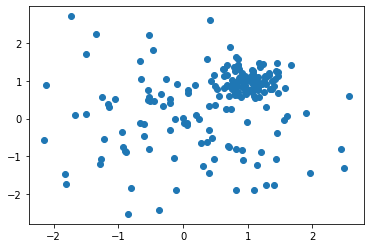

In [10]:

sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.05]], 100)
sample = np.concatenate([sample1, sample2])
plt.scatter(sample[:,0],sample[:,1])


Since the number of points is not too large, we clearly see the two distributions. But let's add more points now. 

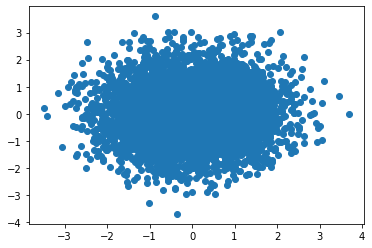

In [11]:

sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 5000)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.05]], 5000)
sample = np.concatenate([sample1, sample2])
plt.scatter(sample[:,0],sample[:,1])


And we just get a blob of mess, no way to see the two distributions. Of course, it's possible to tune our plotting options: 

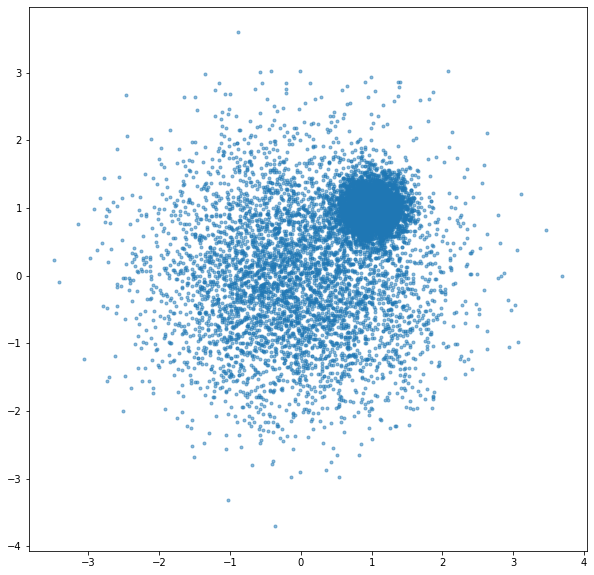

In [12]:

plt.figure(figsize=(10,10))
plt.scatter(sample[:,0],sample[:,1], alpha=0.5, marker='.')


That's much nicer! 

Still, the plot is static. No way to zoom nor to get some information on these points. That's where bokeh will really help. 

## First visualization with bokeh

Let's import some tools from bokeh and initialize it: 

In [13]:
#!pip install bokeh

In [14]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

Then, we can do a simple plot with the following code. 
What is very nice is that we can now hover on the data to get some information, and do a box zoom to focus on part of the data. 

In [15]:

tools = "hover, box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter(sample[:,0], sample[:,1], alpha=0.5)
show(p)


## Bokeh and pandas

The integration between bokeh and pandas works very well. In this section, we will use pandas to add another value to each data point, and we will see how to modify the bokeh tooltip to show this value while hovering. 

First we're going to import: 

* pandas: we will create a pandas dataframe from the numpy array holding our sample, so that we can add a new value to each point. 
* the bokeh ColumnDataSource: it will act as a convenient interface beteween bokeh and the dataframe. 
* the bokeh HoverTool: we'll need it to change the format of the tooltip

In [16]:
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd 

Then, we create the dataframe from our sample, and we print the first rows:

In [17]:
df = pd.DataFrame(sample, columns=('x','y'))
df.head()

,x,y
0,0.849694,1.881592
1,0.394075,0.958888
2,-1.749096,-0.054847
3,0.859521,-0.815819
4,-0.772113,-0.605808


Let's now add a new value to each point, and print again. As an example, I put here the distance of the point from origin, but this value could be anything; it does not have to be a function of x and y. 

In [18]:
df['value'] = np.sqrt(df['x']**2 + df['y']**2)

In [16]:
df.head()

,x,y,value
0,0.849694,1.881592,2.064550
1,0.394075,0.958888,1.036707
2,-1.749096,-0.054847,1.749955
3,0.859521,-0.815819,1.185047
4,-0.772113,-0.605808,0.981408


And finally, we do another plot, with a custom HoverTool: 

In [20]:

source = ColumnDataSource(df)
tools = "box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter('x','y', source=source, alpha=0.5)
p.add_tools(
    HoverTool(
        tooltips=[('value','@value{2.2f}'), 
                  ('index', '@index')]
    )
)
show(p)


In [7]:
df.loc[1034]

NameError: name 'df' is not defined

Using the index given by the tooltip, we can locate the corresponding row in the dataframe: 

In [22]:
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [23]:
#!jupyter labextension install @bokeh/jupyter_bokeh